# Henry PI 2: Machine Learning

Omarly Zerpa

# EDA (Analisis Exploratorio de Datos) 

Se extraen las librerias necesarias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


A continuación, se importa el archivo tipo parquet con los datos de entrenamiento a utilizar en un Pandas DataFrame.

In [2]:
parquet= r'train.parquet'
df= pd.read_parquet(parquet, engine='auto')
df.head(6)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn
5,7047030967,https://dallas.craigslist.org/ndf/apa/d/lewisv...,dallas / fort worth,https://dallas.craigslist.org,1114,house,1649,3,2.0,1,...,0,0,0,w/d hookups,attached garage,https://images.craigslist.org/01212_1J89eIXG9R...,"Own this home with no deposits, fees, or money...",33.0198,-96.9925,tx


Obtenemos informacion basica del dataframe

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [24]:
df.shape

(346479, 22)

Buscamos registros duplicados

In [25]:
df.duplicated().value_counts()

False    346479
dtype: int64

Buscamos si existen valores nulos

In [26]:
df.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

Verificaremos la columna long (longitud) y lat (latitud)

In [31]:
#Buscamos los valores unicos
df['lat'].unique()

array([43.5851, 38.9137, 36.7922, ..., 42.507 , 43.7198, 42.8997])

In [32]:
df['long'].unique()

array([-116.225 , -104.78  ,  -76.1643, ...,  -73.1824,  -85.3338,
        -70.8932])

Creamos un nuevo dataframe para examinar mas de cerca si los datos de  lat y la long pertenecen a la region y estado indicado

In [3]:
df_latitud_longitud= df[['region','state', 'lat', 'long']]

Revisamos que que regiones tienen laitud y logitud nulos

In [4]:
df_latitud_longitud[(df_latitud_longitud['lat'].isnull())]

,region,state,lat,long
62,worcester / central MA,ma,NaN,NaN
369,grand rapids,mi,NaN,NaN
501,denver,co,NaN,NaN
841,columbia,sc,NaN,NaN
976,sarasota-bradenton,fl,NaN,NaN
...,...,...,...,...
345789,toledo,oh,NaN,NaN
345847,huntsville / decatur,al,NaN,NaN
345856,lubbock,tx,NaN,NaN
345995,sarasota-bradenton,fl,NaN,NaN


Examinanos los valores de latitud y longitud de una region en especifico

In [5]:
df_latitud_longitud[(df_latitud_longitud['region']=='denver')]

,region,state,lat,long
306,denver,co,39.6640,-104.845
407,denver,co,39.7415,-104.857
501,denver,co,NaN,NaN
677,denver,co,39.7438,-104.885
1318,denver,co,39.7835,-104.967
...,...,...,...,...
345797,denver,co,39.7378,-104.815
345829,denver,co,39.6500,-104.988
345838,denver,co,39.7441,-105.126
345917,denver,co,39.5692,-105.105


Se evidencia que cada region cuenta con una latitud y longitud especifica imposibilitando el cambio a un valor unico, ya que no se brindaria la ubicacion exacta del inmueble. Ademas desconozco el criterio empleado con dichos valores.

Ahora, se calcula el porcentaje de nulos en la columna latitud y longitud (es la misma cantidad) para evidenciar el impacto que tiene sobre el dataset

In [3]:
nulos= df['lat'].isnull().sum()
total= len(df['lat'])
porcentaje= ((nulos/ total)*100)
print('El porcentaje de nulos en la columna lat', porcentaje)# es irrelevante para hacer una eliminacion de las columnas

El porcentaje de nulos en la columna lat 0.49699981817079825


# Transformaciones 

Se renombran las columnas lat y long

In [3]:
df.rename(columns={'lat':'latitude', 'long':'longitude'}, inplace= True)

Se confirma el cambio

In [ ]:
df.head(2)

Graficamos con dispersion la latitude y longitude, para confirmar que se encuentran en el pais indicado(EEUU) por lo general es: Estándar decimal simple	latitud:37.09024, longitud:-95.712891

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

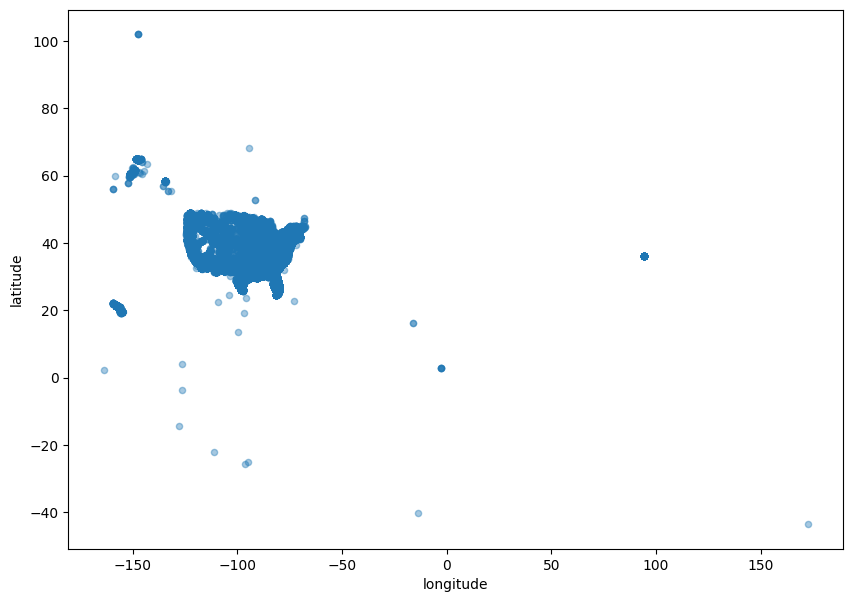

In [13]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10,7))

Existen puntos que se encuentran afueras de los limites de los EEUU, por esta razon no se tomara en cuenta estas columnas para el analisis

Analicemos las columnas laundry_options y parking_options 

In [62]:
nulos= df['laundry_options'].isnull().sum()
total= len(df['laundry_options'])
porcentaje= ((nulos/ total)*100)
print('El porcentaje de nulos en la columna laundry_options', porcentaje)

El porcentaje de nulos en la columna laundry_options 20.541216062156725


In [63]:
nulos= df['parking_options'].isnull().sum()
total= len(df['parking_options'])
porcentaje= ((nulos/ total)*100)
print('El porcentaje de nulos en la columna parking_options', porcentaje)

El porcentaje de nulos en la columna parking_options 36.56267768032117


Como observamos representa un valor mayor al 10% de valores faltantes, podrian ser datos importantes como caracteristica del inmueble si no tuvise valores perdidos o faltantes, ahora para el estudio de este caso se obviaran estas columnas. 

In [4]:
#Se eliminan las columnas mencionadas
df.drop(['laundry_options','parking_options'], axis= 1,  inplace=True)
df.shape

(346479, 20)

Los atribulos no seleccionados para este analisis son:

In [5]:
df.drop(['id', 'url', 'region_url', 'image_url', 'latitude', 'longitude'], axis= 1,  inplace=True)

Se confirman los cambios realizados

In [ ]:
df.info()

Se observa la informacion de la columna type, para saber si requiere algun cambio

In [11]:
df['type'].unique()

array(['house', 'apartment', 'duplex', 'loft', 'condo', 'manufactured',
       'townhouse', 'in-law', 'cottage/cabin', 'flat', 'assisted living',
       'land'], dtype=object)

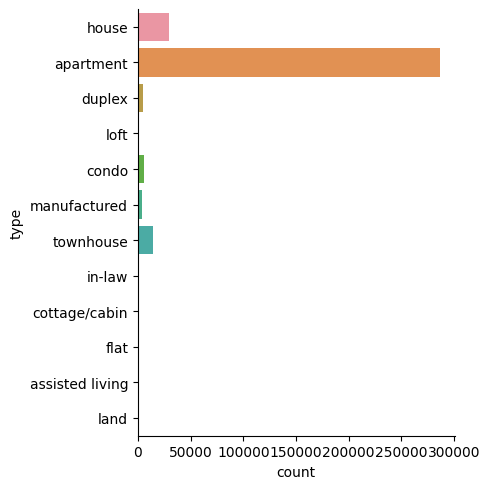

In [25]:
sns.catplot(y = "type", data = df, kind = "count")

Ahora, se crea la columna category_price utilizando la columna price

In [6]:
valores= [-math.inf, 999, 1999,math.inf]
category= ['low','medium','high']
df2= df.assign(category_price= pd.cut(x=df['price'], bins=valores, labels=category, include_lowest=True))
df2

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,description,state,category_price
0,boise,1350,house,1200,2,2.0,1,1,1,0,0,0,Super cute row house in the Boise bench area. ...,id,medium
1,colorado springs,1115,apartment,694,1,1.0,1,1,1,0,0,0,Windtree Apartment Homes currently has a spaci...,co,medium
2,norfolk / hampton roads,1129,apartment,900,2,2.0,0,0,1,0,0,0,Call Today! show contact info Indian Lakes ...,va,medium
3,phoenix,1580,house,1469,3,2.0,1,1,1,0,0,0,Cody Anderson Two Brothers Realty License #: S...,az,medium
4,nashville,995,apartment,700,1,1.0,1,1,1,0,0,0,To schedule a tour We now book our tour appoin...,tn,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,evansville,672,apartment,660,1,1.0,1,1,1,0,0,0,"The pool, the office, the 24-hour on-site laun...",in,low
346475,san diego,2122,apartment,1099,2,2.0,1,1,1,0,0,0,Seize your chance to live in our beautiful apa...,ca,high
346476,columbia,1014,apartment,1104,2,2.0,1,1,0,0,0,0,Tucked into the rolling landscape of Southeast...,sc,medium
346477,north dakota,935,apartment,1050,2,2.0,0,0,0,0,0,0,Enjoy living at Southwood Apartments! Located ...,nd,low


Se grafica los datos de la columna creada para visualizar la cantidad de inmubles que existe con price low, medium y high

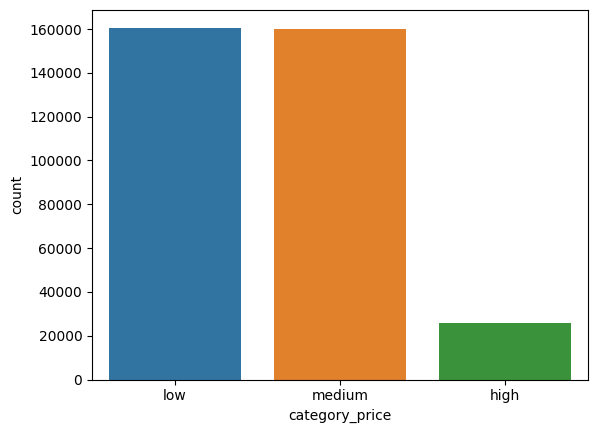

In [6]:
sns.countplot(x='category_price', data=df2) #equivelante a sns.countplot(df.Conversion2)
plt.show()

Se crea una columna target la cual me indique 1 para los inmuebles con price low y 0 para los inmuebles con price medium y high

In [7]:
df2['target'] = df2['category_price'].apply(lambda x : 1 if x=='low' else 0)
df2

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,description,state,category_price,target
0,boise,1350,house,1200,2,2.0,1,1,1,0,0,0,Super cute row house in the Boise bench area. ...,id,medium,0
1,colorado springs,1115,apartment,694,1,1.0,1,1,1,0,0,0,Windtree Apartment Homes currently has a spaci...,co,medium,0
2,norfolk / hampton roads,1129,apartment,900,2,2.0,0,0,1,0,0,0,Call Today! show contact info Indian Lakes ...,va,medium,0
3,phoenix,1580,house,1469,3,2.0,1,1,1,0,0,0,Cody Anderson Two Brothers Realty License #: S...,az,medium,0
4,nashville,995,apartment,700,1,1.0,1,1,1,0,0,0,To schedule a tour We now book our tour appoin...,tn,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,evansville,672,apartment,660,1,1.0,1,1,1,0,0,0,"The pool, the office, the 24-hour on-site laun...",in,low,1
346475,san diego,2122,apartment,1099,2,2.0,1,1,1,0,0,0,Seize your chance to live in our beautiful apa...,ca,high,0
346476,columbia,1014,apartment,1104,2,2.0,1,1,0,0,0,0,Tucked into the rolling landscape of Southeast...,sc,medium,0
346477,north dakota,935,apartment,1050,2,2.0,0,0,0,0,0,0,Enjoy living at Southwood Apartments! Located ...,nd,low,1


Se verifican los cambios realizados

In [ ]:
df2.info()

Se verifican los maximos y minimos de los precios, cuartos y baños en busca de precios anomalos, si existen se procede a eliminarlos, ya no nos nos servirian para el analisis.

In [52]:
df2.price.min(), df2.price.max()

(0, 2768307249)

In [8]:
df2['price'][df2.price == 2768307249].count()

1

In [61]:
p=df2['price'][df2.price == 2768307249].index
p

Int64Index([106214], dtype='int64')

In [54]:
df2.beds.min(), df2.beds.max()

(0, 1100)

In [11]:
df2['beds'][df2.beds == 1100].count()

1

In [10]:
b=df2['beds'][df2.beds == 1100].index
b

Int64Index([316209], dtype='int64')

In [55]:
df2.baths.min(), df2.baths.max()

(0.0, 75.0)

In [12]:
df2['baths'][df2.baths == 75.0].count()

1

In [14]:
ba=df2['baths'][df2.baths == 75.0].index
ba

Int64Index([316209], dtype='int64')

In [8]:
df2.drop([106214,316209], axis=0, inplace=True)

In [75]:
df2['beds'].median()# valor intermedio

2.0

In [79]:
df2['baths'].median()# valor intermedio

1.0

Correlaciones de variables

In [10]:
#se crea una lista con los atributos de los inmuebles
atributos= df2[['sqfeet','beds','baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed','wheelchair_access', 'electric_vehicle_charge','comes_furnished','target', 'price']]

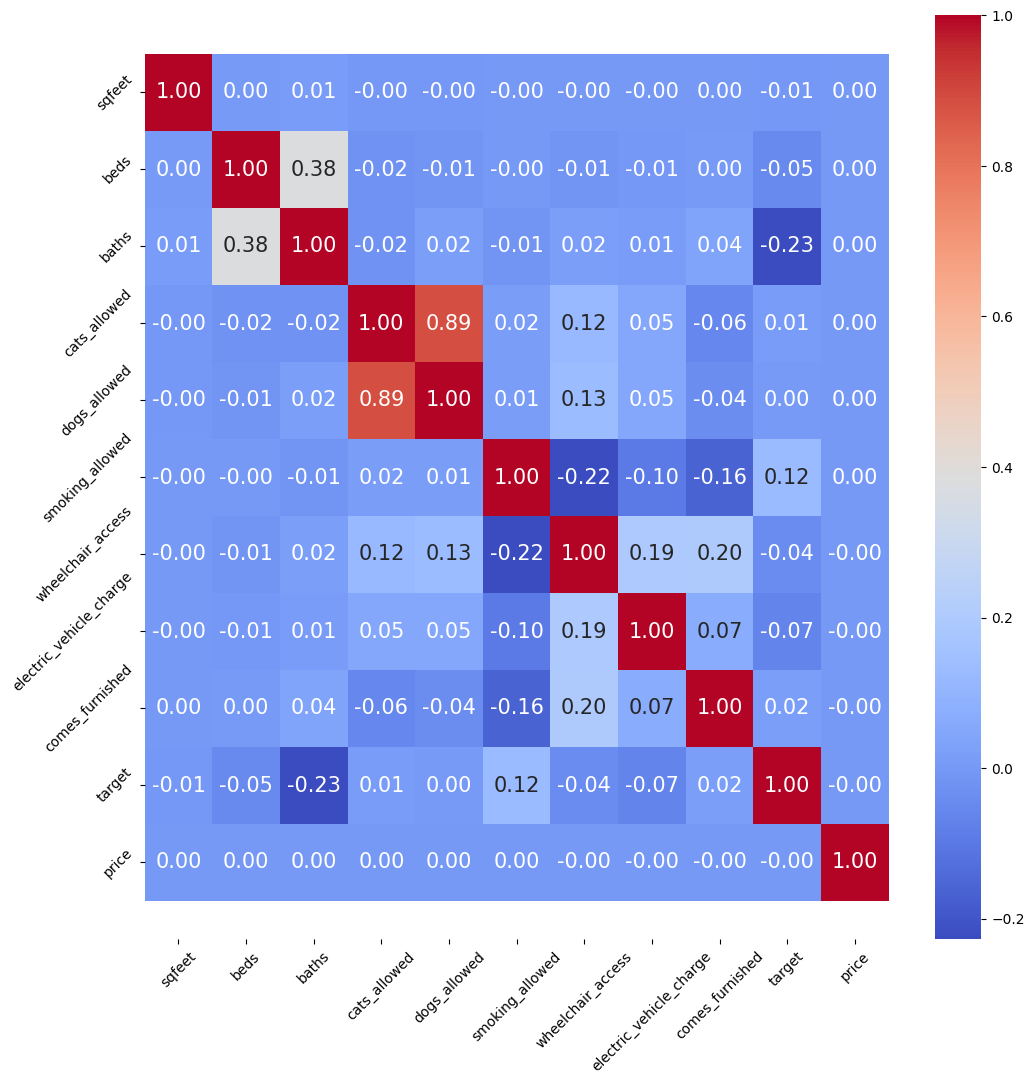

In [11]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,12))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # descubre los valores para bottom y top
    b += 0.5 # Agrega 0.5 al bottom
    t -= 0.5 # Resta 0.5 de la parte de top
    plt.ylim(b, t) # actualizar los valores  ylim(bottom, top)
    plt.show()

corr = atributos.corr()
plot_corre_heatmap(corr)

Defino mi tabla train a utilizar para el modelo

In [9]:
train= df2 
train.head(2)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,description,state,category_price,target
0,boise,1350,house,1200,2,2.0,1,1,1,0,0,0,Super cute row house in the Boise bench area. ...,id,medium,0
1,colorado springs,1115,apartment,694,1,1.0,1,1,1,0,0,0,Windtree Apartment Homes currently has a spaci...,co,medium,0


Dado la cantidad de nulos y valores no pertenecientes las columnas latitude y longitude,y escasa correlaciones entre las caracteristicas y el precio del inmueble, tomé la descripción para obtener palabras reelevantes que me permitan deducir si un inmueble tiene precio bajo o alto.

Vemos si existen descripciones faltantes en la columna descripción

In [10]:
train['description'].isnull().sum()

2

Eliminamos las descripciones vacías porque mejora la performance del modelo

In [11]:
train.dropna(subset='description', inplace=True)

Revisamos que no hayan quedado registros con descripciones vacías

In [12]:
train['description'].isnull().sum()

0

# Preprocesamiento de datos utilizando la columna descripcion y target

Importamos los modulos a utilizar

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

Obtenemos los stop words de esta biblioteca

In [35]:
sw = nltk.corpus.stopwords.words('spanish')

Nos quedamos con la lista de los textos de las descripciones

In [36]:
corpus = train['description']

Lo convertimos a lista

In [37]:
corpus = list(corpus)

Instanciamos el vectorizador con los stop words y un máximo de features de 1000

In [38]:
vectorizer = TfidfVectorizer(stop_words=sw, max_features=1000)

Vectorizamos los datos

In [46]:
x = vectorizer.fit_transform(corpus)

Vemos la cantidad de datos obtenidos

In [24]:
x.shape

(346477, 1000)

Obtenemos la variable objetivo

In [25]:
y = train['target']

Dimension de la variable objetivo

In [27]:
y.shape

(346477,)

# Preprocesamiento de datos utilizando una tabla nueva de train llamada train1 agragandoles dummies y target

In [41]:
train1=train.drop(['target','category_price', 'price','description'], axis=1)
train1.head(2)

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,state
0,boise,house,1200,2,2.0,1,1,1,0,0,0,id
1,colorado springs,apartment,694,1,1.0,1,1,1,0,0,0,co


In [43]:
train1_dummies = pd.get_dummies(train1)
train1_dummies

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,region_SF bay area,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,1200,2,2.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,694,1,1.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,900,2,2.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1469,3,2.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,700,1,1.0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,660,1,1.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346475,1099,2,2.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346476,1104,2,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346477,1050,2,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X1= train1_dummies
y1= train.target

In [48]:
X1.shape, y1.shape

((346475, 476), (346475,))

# Pipeline utilizando la columna descripcion y target

Importamos las librerias necesarias

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
import numpy as np
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.pipeline import Pipeline
import joblib

In [29]:
pipe_rf = Pipeline([('rf', RandomForestClassifier(n_estimators=50, random_state=0)),])

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(n_estimators=50, random_state=0))])

Guardamos el Pipeline en un archivo Pickle

In [32]:
joblib.dump(pipe_rf, 'modelo_random_forest2.pkl', compress=1)

['modelo_random_forest2.pkl']

Cargamos el archivo creado de nuestro modelo

In [33]:
rf = joblib.load('modelo_random_forest2.pkl')

Ajustamos el umbral de puntuacion (Adjust Score Threshold): Ajustar este valor cambia el nivel de confianza que debe tener el modelo en una predicción antes de considerar que la predicción es positiva. También cambia la cantidad de falsos negativos y falsos positivos que está dispuesto a tolerar en sus predicciones.

In [34]:
y_pred = np.where(rf.predict_proba(x_test) [:,1] > 0.2, 1, 0)

Generamos una matriz de confusion

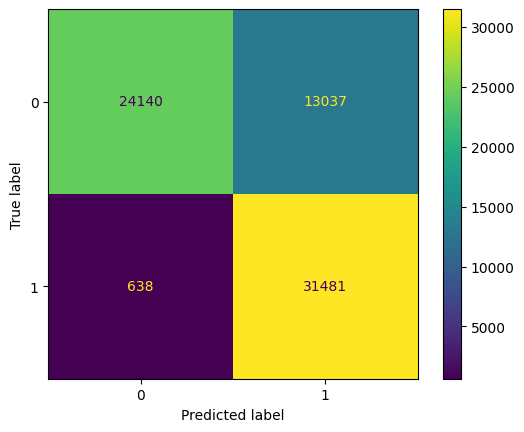

In [35]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=rf.classes_)
disp.plot()

Determinados la exhaustividad(recall), la precision y la exactitud(accuracy)

In [36]:
rs = recall_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print(f'Recall: {rs}')
print(f'Precision: {ps}')
print(f'Accuracy: {ac}')

Recall: 0.980136367881939
Precision: 0.7071521631699538
Accuracy: 0.8026581620872778


# Pipeline utilizando creando una nueva tabla llamada train1 con dummies y target

In [49]:
pipe_rf1 = Pipeline([('rf1', RandomForestClassifier(n_estimators=50, random_state=0)),])

In [50]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [51]:
pipe_rf1.fit(X1_train, y1_train)

Pipeline(steps=[('rf1',
                 RandomForestClassifier(n_estimators=50, random_state=0))])

In [52]:
y1_pred = np.where(pipe_rf1.predict_proba(X1_test) [:,1] > 0.2, 1, 0)

In [53]:
rs = recall_score(y1_test, y1_pred)
ps = precision_score(y1_test, y1_pred)
ac = accuracy_score(y1_test, y1_pred)

print(f'Recall: {rs}')
print(f'Precision: {ps}')
print(f'Accuracy: {ac}')

Recall: 0.9696372732958098
Precision: 0.8591654660312534
Accuracy: 0.9126343892055704


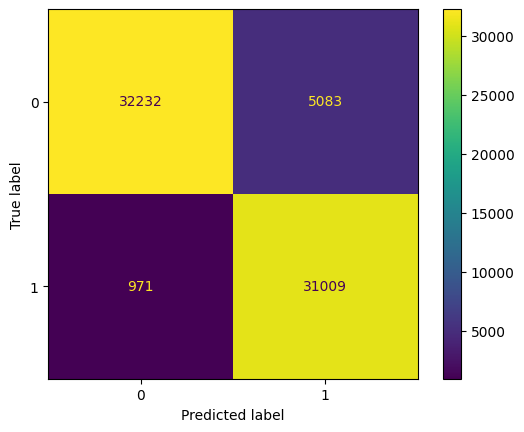

In [54]:
cm = confusion_matrix(y1_test, y1_pred, labels=pipe_rf1.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=pipe_rf1.classes_)
disp.plot()

# Traemos el archivo test

Cargamos el DataFrame

In [55]:
parquet= r'test.parquet'
df_t= pd.read_parquet(parquet, engine='auto')
df_t.head(2)

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt


In [ ]:
df_t.info()

Realizamos las mismas transformaciones que realizamos para el train

In [56]:
#renombramos las columnas
df_t.rename(columns={'lat':'latitude', 'long':'longitude'}, inplace=True)

In [57]:
#Eliminamos los columanas por las razones explicadas con anterioridad
df_t.drop(['id', 'url', 'region_url', 'laundry_options', 'parking_options', 'image_url','latitude', 'longitude'], axis=1, inplace= True)

In [58]:
#Creamos la columna category_price
valores2= [-math.inf, 999, 1999,math.inf]
category2= ['low','medium','high']
df_t2= df.assign(category_price= pd.cut(x=df['price'], bins=valores, labels=category, include_lowest=True))

In [59]:
#Creamos la columna target
df_t2['target']= df_t2['category_price'].apply(lambda x:1 if x=='low' else 0)

In [60]:
#Se define la tabla test ha utilizar
test= df_t2
test.head(4)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,description,state,category_price,target
0,boise,1350,house,1200,2,2.0,1,1,1,0,0,0,Super cute row house in the Boise bench area. ...,id,medium,0
1,colorado springs,1115,apartment,694,1,1.0,1,1,1,0,0,0,Windtree Apartment Homes currently has a spaci...,co,medium,0
2,norfolk / hampton roads,1129,apartment,900,2,2.0,0,0,1,0,0,0,Call Today! show contact info Indian Lakes ...,va,medium,0
3,phoenix,1580,house,1469,3,2.0,1,1,1,0,0,0,Cody Anderson Two Brothers Realty License #: S...,az,medium,0


Preparamos la columna description para utilizarla 

In [61]:
# Vemos descripciones faltantes en la columna descripción
test['description'].isnull().sum()

2

In [62]:
# Obtenemos los índices de los registros con descripciones vacías
sin_desc = test[test.description.isnull()].index
sin_desc

Int64Index([198741, 210823], dtype='int64')

Se crea una funcion para para rellenar la descripciones faltantes en la columna description

In [63]:
def crearDescription(df, num_loc):
    '''
    Arma la descripción faltante con datos existentes

    df: DataFrame a analizar
    num_loc: índice del registro a cambiar
    '''
    cadena = ''
    # Evaluamos con que características contamos para armar
    # las descripciónes faltantes de las propiedades
    if not df.isnull().type[num_loc]: 
            cadena += df.type[num_loc] + ' '
    if not df.isnull().region[num_loc]:
        cadena += df.region[num_loc] + ' '
    if not df.isnull().beds[num_loc]:
        cadena += str(int(df.beds[num_loc])) + ' habitaciones '
    if not df.isnull().baths[num_loc]:
        cadena += str(int(df.baths[num_loc])) + ' baños'
    
    return cadena

Ahora, recorremos los índices de los registros con descripciones faltantes para completarlas

In [64]:
for idx in sin_desc:
    test.loc[idx,('description')] = crearDescription(test, idx) 

In [65]:
# Verificamos que todas las propiedades tengan una descripción
test['description'].isnull().sum()

0

In [57]:
# Obtenemos los stop words de esta biblioteca 
sw = nltk.corpus.stopwords.words('spanish')

In [58]:
# Nos quedamos con la lista de los textos de las descripciones
corpus_t = test['description']

In [59]:
# Lo convertimos a lista
corpus_t = list(corpus_t)

In [60]:
# Verificamos el tamaño de los datos obtendos, para observar que coincide 
# con la cantidad de registros a predecir
len(corpus_t)

346479

Se realiza la modelizacion 

In [61]:
# Instanciamos el vectorizador con los stop words y un máximo de features de 1000
vectorizer_t = TfidfVectorizer(stop_words=sw, max_features=1000)

In [62]:
# Vectorizamos los datos
x_t = vectorizer_t.fit_transform(corpus_t)

In [63]:
#Observamos la cantidad de datos obtenidos
x_t.shape

(346479, 1000)

In [64]:
#Ajustamos el umbral de puntuacion (Adjust Score Threshold)
y_t_predict = np.where(rf.predict_proba(x_t) [:,1] > 0.2, 1, 0)

Preparamos la columna tests para covertirla en test1 con dummies para utilizarla

In [67]:
test.beds.min(), test.beds.max()

(0, 1100)

In [69]:
test['beds'][test.beds==1100].count()

1

In [76]:
test['beds']=test['beds'].replace([1100], 2)# valor de cuartos promedio

In [77]:
test.baths.min(), test.baths.max()

(0.0, 75.0)

In [78]:
test['baths'][test.baths==75.0].count()

1

In [80]:
test['baths']=test['baths'].replace([75.0], 1.0)# valor de baths promedio

In [81]:
test1= test.drop(['target','category_price', 'price', 'description'], axis=1)
test1.head(2)

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,state
0,boise,house,1200,2,2.0,1,1,1,0,0,0,id
1,colorado springs,apartment,694,1,1.0,1,1,1,0,0,0,co


In [82]:
test_dummies=pd.get_dummies(test1)
test_dummies

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,region_SF bay area,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,1200,2,2.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,694,1,1.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,900,2,2.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1469,3,2.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,700,1,1.0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,660,1,1.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346475,1099,2,2.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346476,1104,2,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346477,1050,2,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Especificamos nuestra X
X_td=test_dummies

In [84]:
#Visualizamos la cantidad de datos
X_td.shape

(346479, 476)

In [86]:
#Ajustamos el umbral de puntuacion (Adjust Score Threshold)
y_t_predict1 = np.where(pipe_rf1.predict_proba(X_td) [:,1] > 0.2, 1, 0)

# Generación del CSV

Creamos el DataFrame que contendrá las predicciones obtenidas con los datos de train(description) 

In [65]:
datos = pd.DataFrame()

Creamos la columna pred con los datos obtendiso de la predicción

In [66]:
datos['pred'] = y_t_predict

Lo guardamos con formato CSV

In [67]:
datos.to_csv('OmarlyZerpa.csv', index=False)

Creamos el DataFrame que contendrá las predicciones obtenidas con los datos de train_dummies 

In [87]:
datos1 = pd.DataFrame()

In [88]:
datos1['pred'] = y_t_predict1

In [90]:
datos1.to_csv('OmarlyZerpa.csv', index=False)